In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [2]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [3]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_2.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
50995,1155,0,17,22,0.0,18.0,1.938849,1.0,3.001175,0.0,...,0,1,0,1,0,0,0,0,0,0
20384,94905,0,5573,18,0.0,252.0,18.306452,13.0,22.942557,0.0,...,1,0,1,0,0,0,0,0,0,2
46281,1204214,0,6418,1,0.0,96.0,5.763085,3.0,10.750312,0.0,...,0,0,0,0,0,0,0,1,0,0
28138,25723,0,3586,2,0.0,60.0,22.599476,21.0,12.494996,0.0,...,0,1,1,0,0,0,0,0,0,1
29374,468063,601,137,77,0.0,760.0,33.284810,7.0,91.815314,0.0,...,0,0,0,0,0,0,1,0,0,1
32944,3316706,2842,9114,35,0.0,44.0,4.465950,2.0,6.986784,0.0,...,0,0,0,0,1,0,0,0,0,0
81148,309914,13,5432,26,0.0,371.0,8.256148,4.5,20.474944,0.0,...,0,0,0,0,0,1,0,0,0,17
69339,70695,0,7237,18,0.0,367.0,29.430556,12.0,48.235291,0.0,...,0,0,0,0,0,0,0,0,1,2
79387,2156275,114,47233,9,0.0,421.0,80.601108,64.0,73.127418,0.0,...,1,0,0,0,0,0,0,0,1,0
58160,572325,0,27248,24,0.0,377.0,30.714617,18.0,45.448165,0.0,...,0,0,0,0,0,0,0,1,0,3


In [4]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,1,0,0,0,0,0,0,0,1
4,634995,0,463,1,0.0,1275.0,13.837736,1.0,103.361027,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,1,0,0,0
81308,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,1,0,0
81309,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,1,0,0
81310,7170111,70,497000,9,0.0,2147.0,497.620000,226.5,548.462976,0.0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
derived = training_dataset.iloc[:, 4:29]
derived.sample(n=5)

,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,Derived11,Derived12,Derived13,Derived14,...,Derived20,Derived21,Derived22,Derived23,Derived24,Derived25,Derived26,Derived27,Derived28,Derived29
67239,0.0,1125.0,64.882812,43.0,104.748928,0.0,531.0,27.496094,9.0,49.956543,...,0.0,1004.0,61.613281,40.0,96.721385,-829.0,187.0,1.300781,-3.0,74.727522
13667,0.0,65.0,4.960854,2.0,7.755280,0.0,55.0,2.434164,0.0,6.034607,...,0.0,63.0,4.704626,2.0,7.470579,-18.0,47.0,0.775801,0.0,6.490309
26878,0.0,1.0,0.107143,0.0,0.309295,0.0,1.0,0.035714,0.0,0.185577,...,0.0,1.0,0.107143,0.0,0.309295,-1.0,1.0,-0.035714,0.0,0.325373
43402,0.0,163.0,3.461538,1.0,11.291602,0.0,54.0,1.206294,0.0,4.560713,...,0.0,135.0,3.174825,1.0,9.689454,-56.0,54.0,-0.003497,0.0,6.115153
3743,0.0,28.0,5.190751,4.0,5.002141,0.0,28.0,1.982659,1.0,3.694198,...,0.0,28.0,5.011561,3.0,4.913104,-15.0,28.0,0.017341,0.0,5.126689


In [6]:
total_number_of_comments = training_dataset.iloc[:, 29:34]
total_number_of_comments.sample(n=5)

,CC1,CC2,CC3,CC4,CC5
49707,21,0,21,21,-21
38564,347,192,155,341,37
77101,11,1,10,10,-9
15017,3,0,1,3,-1
15002,28,28,0,28,28


In [7]:
post_published_weekday = training_dataset.iloc[:, 39:46]
post_published_weekday.sample(n=5)

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
20473,0,0,0,0,0,1,0
32628,0,0,1,0,0,0,0
29433,0,0,0,0,0,1,0
51423,0,0,0,0,0,1,0
78524,0,0,0,0,0,0,1


In [8]:
for i, row in post_published_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [9]:
base_datetime_weekday = training_dataset.iloc[:, 46:53]
base_datetime_weekday.sample(n=5)

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
19331,1,0,0,0,0,0,0
70940,0,1,0,0,0,0,0
30919,0,0,0,0,0,0,1
10179,0,1,0,0,0,0,0
43813,0,0,0,0,0,0,1


In [10]:
for i, row in base_datetime_weekday.iterrows():
    if sum(row) > 1:
        print("Row " + str(i) + " is more than 1")

In [11]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,3
4,0
...,...
81307,80
81308,12
81309,72
81310,14


In [12]:
pd.concat(
    [total_number_of_comments, post_published_weekday, base_datetime_weekday, labels], axis=1
).sample(n=10)

,CC1,CC2,CC3,CC4,CC5,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
65281,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
78972,13,13,0,13,13,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6
37549,9,0,5,9,-5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
76624,30,0,2,30,-2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
20106,4,4,0,4,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
59585,34,34,0,34,34,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
71255,83,0,83,83,-83,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2
35436,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
49876,1,0,1,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
66183,87,9,78,78,-69,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [13]:
str(training_dataset.shape)

'(81312, 54)'

In [14]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Page Popularity/likes             81312 non-null  int64  
 1   Page Checkinsâ€™s                 81312 non-null  int64  
 2   Page talking about                81312 non-null  int64  
 3   Page Category                     81312 non-null  int64  
 4   Derived5                          81312 non-null  float64
 5   Derived6                          81312 non-null  float64
 6   Derived7                          81312 non-null  float64
 7   Derived8                          81312 non-null  float64
 8   Derived9                          81312 non-null  float64
 9   Derived10                         81312 non-null  float64
 10  Derived11                         81312 non-null  float64
 11  Derived12                         81312 non-null  float64
 12  Deri

In [15]:
training_dataset.describe()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
count,8.131200e+04,81312.000000,8.131200e+04,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,...,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,1.313921e+06,4667.704336,4.475377e+04,24.255633,0.707190,464.665781,55.728933,35.392255,67.588653,0.143361,...,0.146153,0.136954,0.141049,0.133400,0.138417,0.145477,0.155180,0.144997,0.141480,7.190611
std,6.804951e+06,20561.261034,1.109279e+05,19.949156,12.169748,520.925523,85.243275,67.043844,82.836764,7.819979,...,0.353262,0.343801,0.348075,0.340008,0.345340,0.352583,0.362078,0.352100,0.348518,36.049374
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,47.000000,5.190751,2.000000,8.032349,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,251.000000,22.794183,13.000000,32.565168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.791489,42.000000,102.060861,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1311.000000,2438.000000,1693.500000,1693.500000,743.091650,1311.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1966.000000


## Normalization

In [16]:
def normalize(X, y):
    x_scaler = MinMaxScaler()
    x_scaler.fit(X)
    X_norm = x_scaler.transform(X)
    y_scaler = MinMaxScaler()
    y_scaler.fit(y)
    y_norm = y_scaler.transform(y)
    return X_norm, y_norm

In [17]:
X_norm, y_norm = normalize(features, labels)

In [18]:
training_dataset_norm = pd.concat([pd.DataFrame(X_norm), pd.DataFrame(y_norm)], axis=1)
training_dataset_norm.columns = [header.iat[0, i] for i in range(0, 54)]
training_dataset_norm.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
79705,0.003180,0.057965,9.786136e-03,0.076190,0.0,0.578753,0.047171,0.024505,0.168741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000509
40458,0.000052,0.001502,1.067334e-05,0.361905,0.0,0.031993,0.011352,0.008267,0.020122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
55358,0.000007,0.000054,1.642052e-07,0.152381,0.0,0.012715,0.002251,0.001181,0.006764,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
5952,0.000848,0.000000,3.169324e-03,0.219048,0.0,0.157506,0.022239,0.013581,0.063256,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
74185,0.000003,0.000000,9.540321e-05,0.142857,0.0,0.067268,0.004838,0.001771,0.026988,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
67074,0.001300,0.000982,2.773754e-02,0.161905,0.0,0.278097,0.069721,0.025982,0.209841,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016277
24668,0.000040,0.000000,2.591158e-04,0.161905,0.0,0.046760,0.010407,0.007381,0.024583,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
31628,0.015535,0.000000,2.023681e-02,0.104762,0.0,0.015587,0.001972,0.000590,0.007241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
42050,0.000453,0.000000,2.100513e-03,0.161905,0.0,0.183347,0.023323,0.013581,0.068446,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
48804,0.000021,0.000000,3.284104e-07,0.514286,0.0,0.009024,0.000736,0.000000,0.004975,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000


# Exploratory Data Analysis

## Univariate Analysis

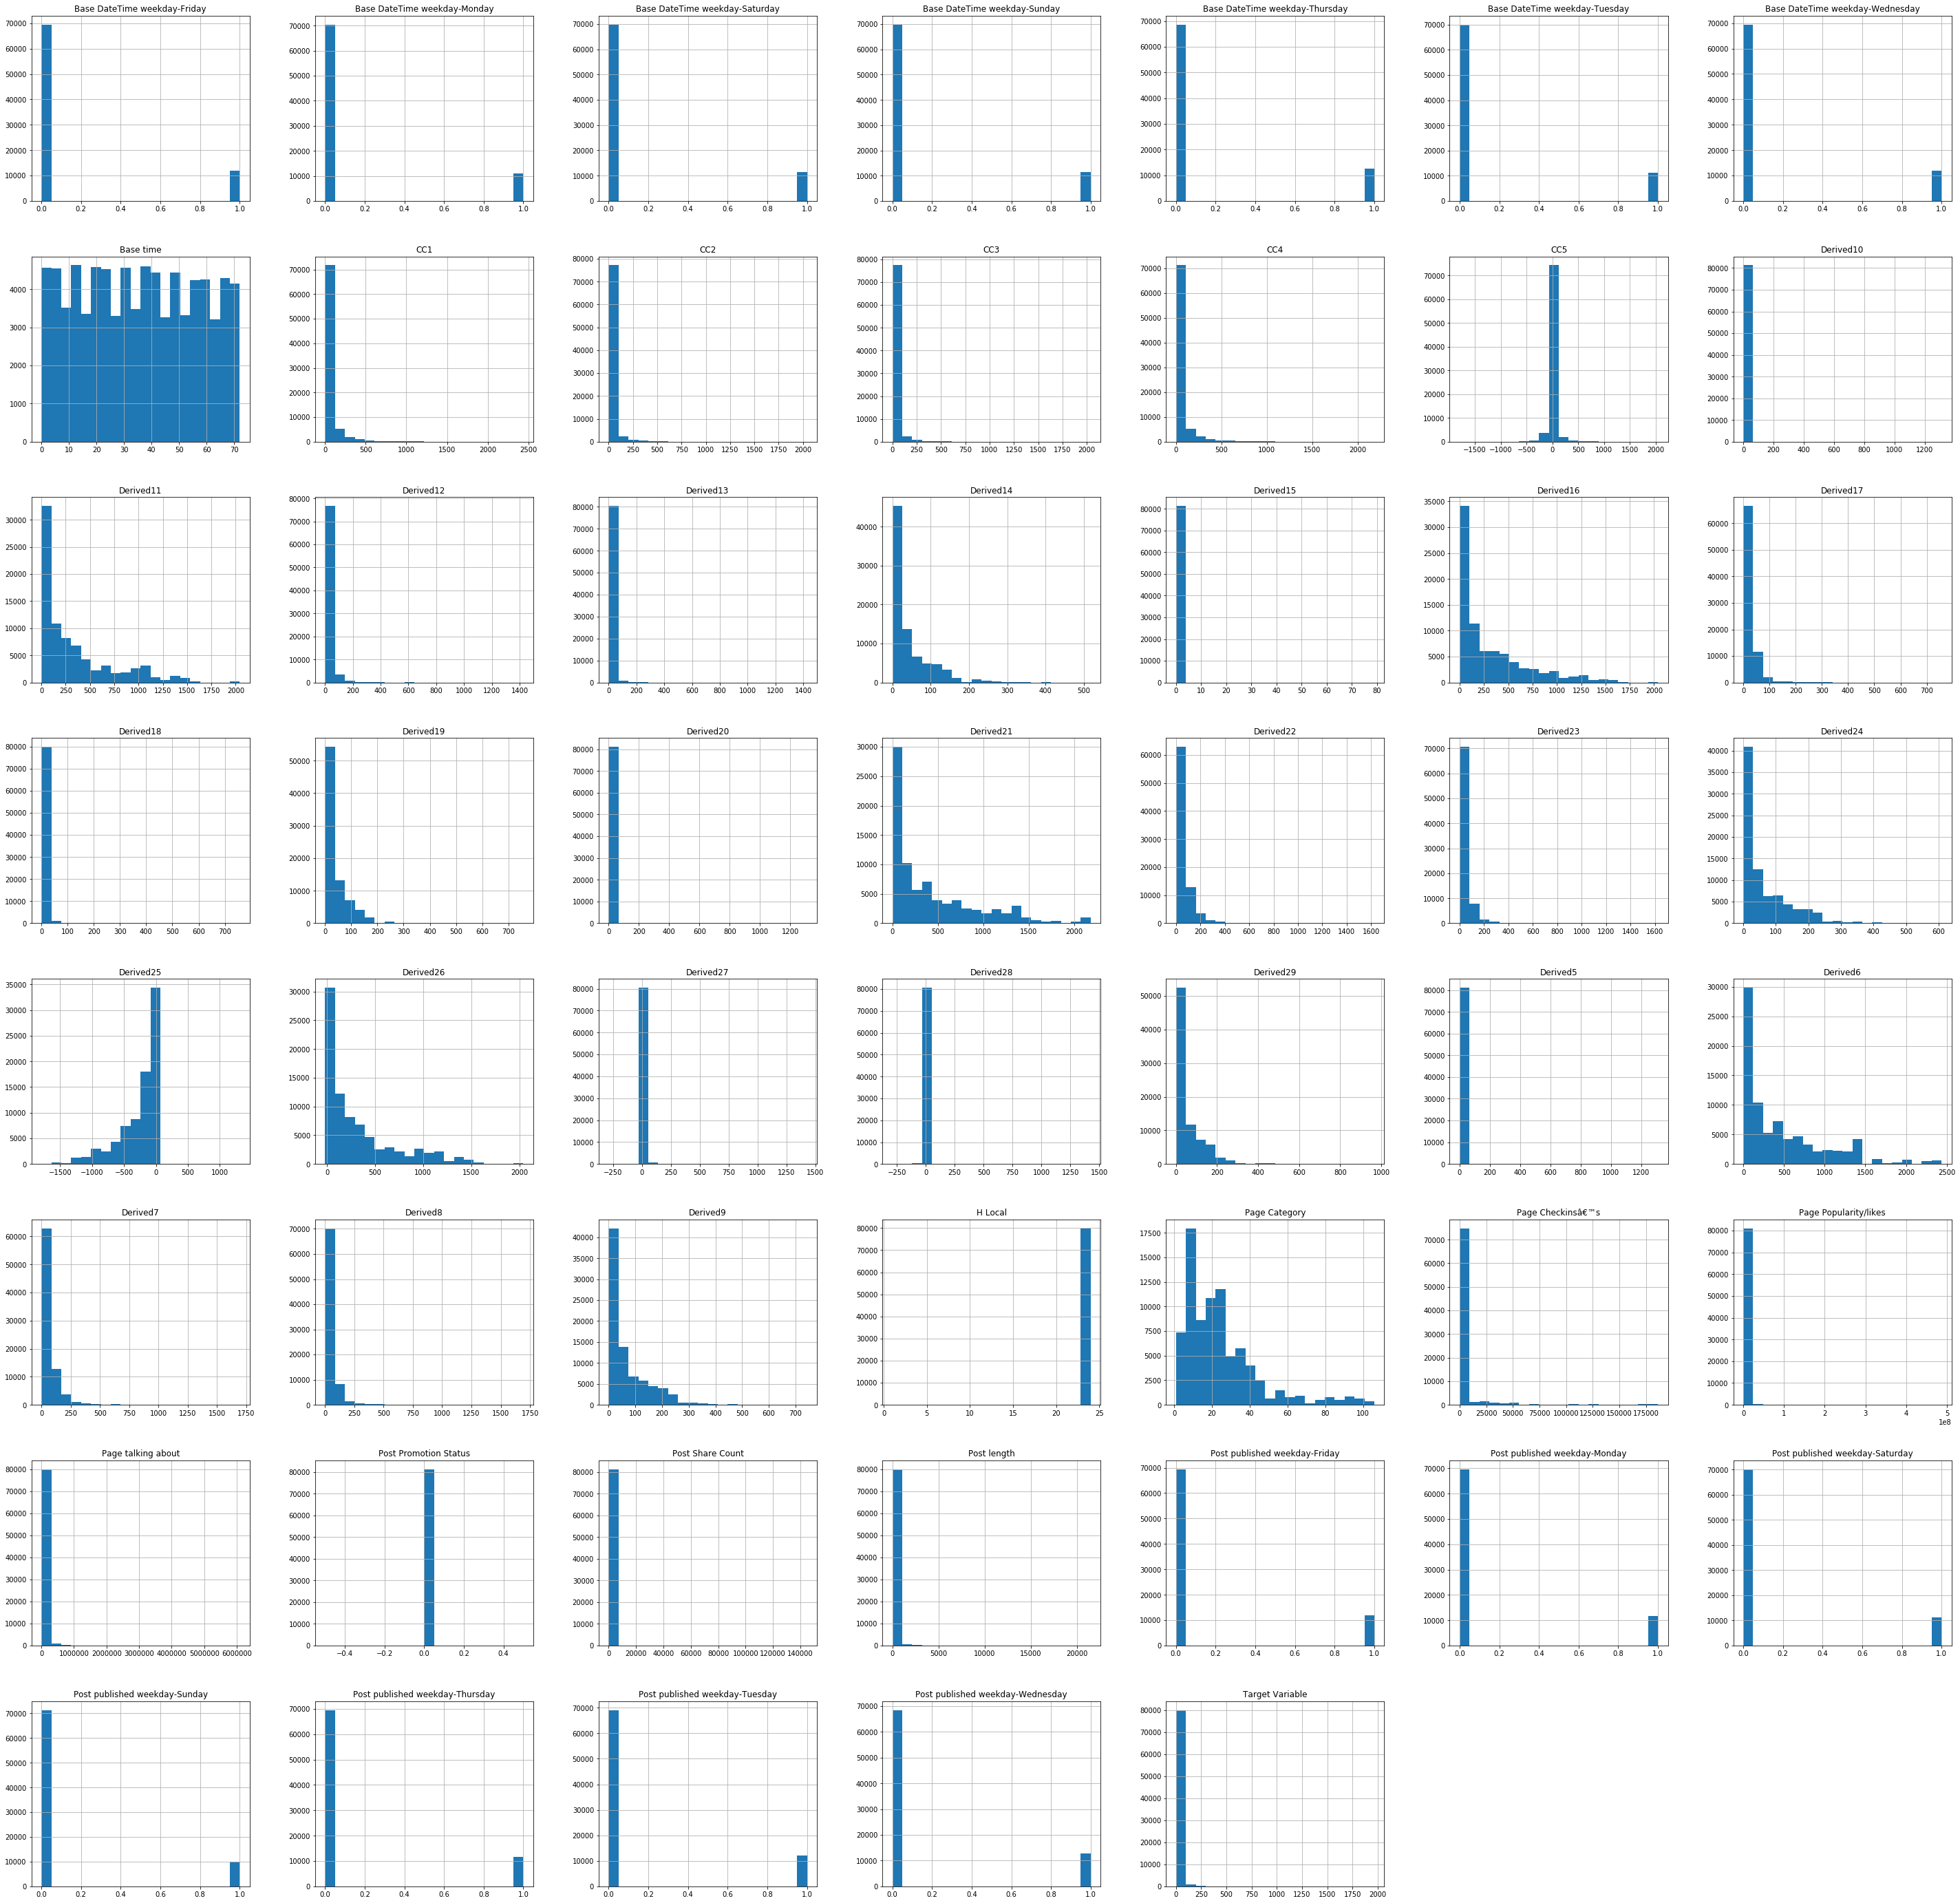

In [19]:
training_dataset.hist(bins=20, figsize=(50, 50))
plt.show()

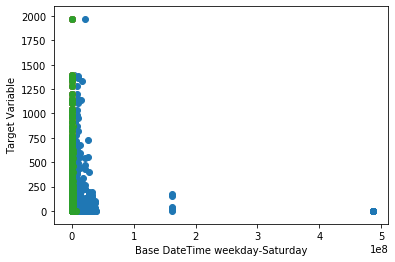

In [45]:
features_list = features.columns
for feature in features_list: 
    feature_set = training_dataset[feature]
    plt.scatter(feature_set, labels)
    plt.ylabel("Target Variable")
    plt.xlabel(feature)
    plt.show

In [49]:
features_list

Index(['Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about',
       'Page Category', 'Derived5', 'Derived6', 'Derived7', 'Derived8',
       'Derived9', 'Derived10', 'Derived11', 'Derived12', 'Derived13',
       'Derived14', 'Derived15', 'Derived16', 'Derived17', 'Derived18',
       'Derived19', 'Derived20', 'Derived21', 'Derived22', 'Derived23',
       'Derived24', 'Derived25', 'Derived26', 'Derived27', 'Derived28',
       'Derived29', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',
       'Post length', 'Post Share Count', 'Post Promotion Status', 'H Local',
       'Post published weekday-Sunday', 'Post published weekday-Monday',
       'Post published weekday-Tuesday', 'Post published weekday-Wednesday',
       'Post published weekday-Thursday', 'Post published weekday-Friday',
       'Post published weekday-Saturday', 'Base DateTime weekday-Sunday',
       'Base DateTime weekday-Monday', 'Base DateTime weekday-Tuesday',
       'Base DateTime weekday-Wednesday', 'Base D

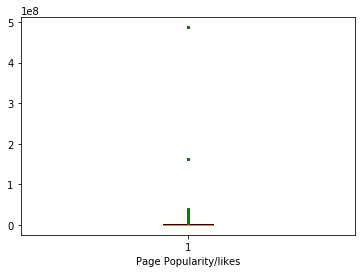

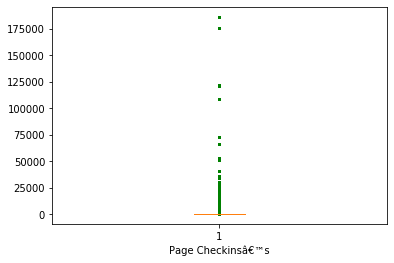

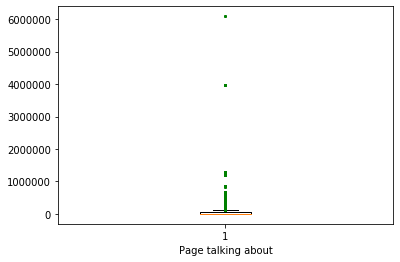

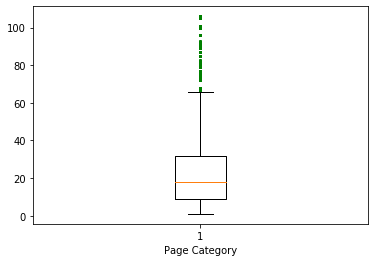

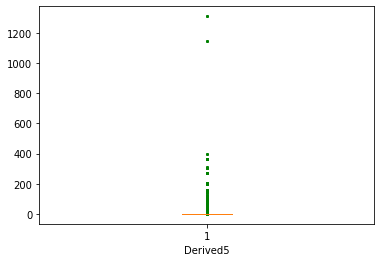

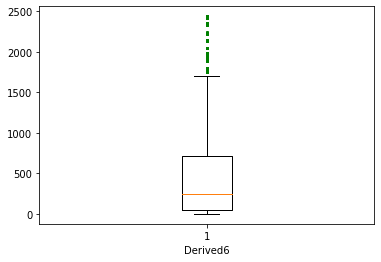

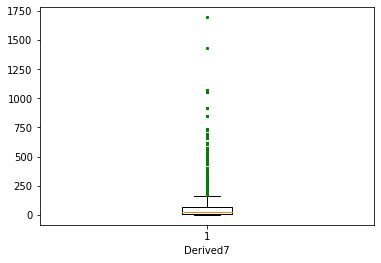

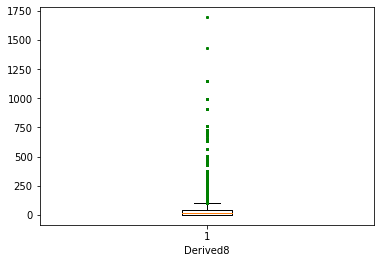

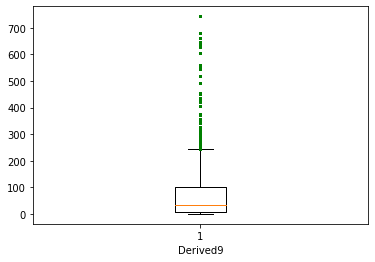

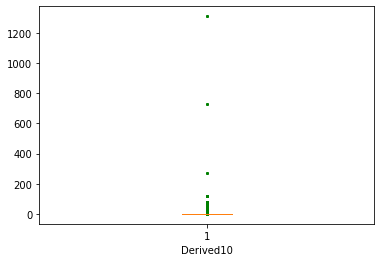

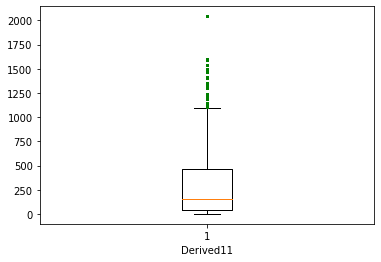

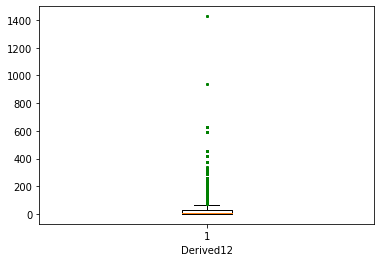

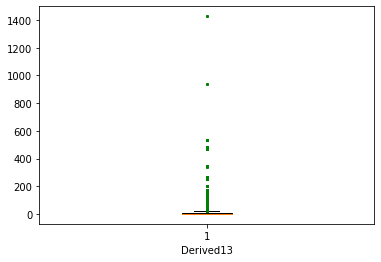

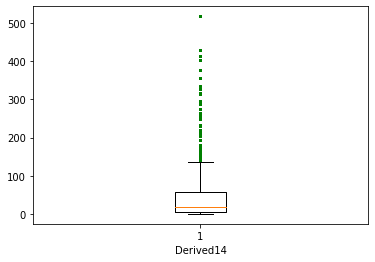

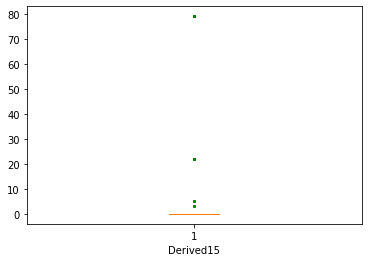

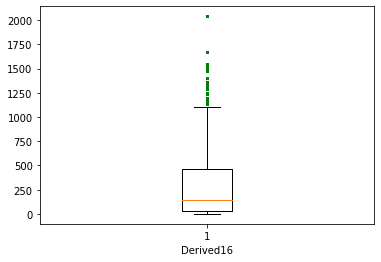

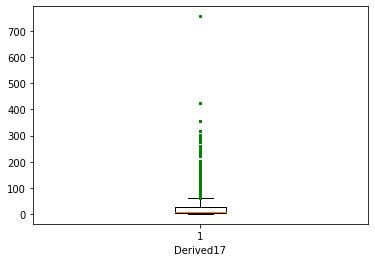

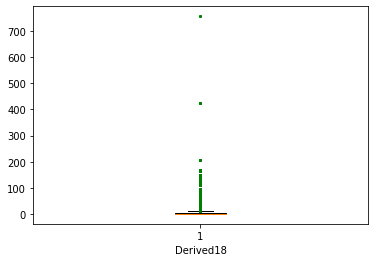

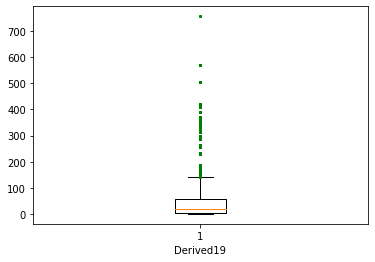

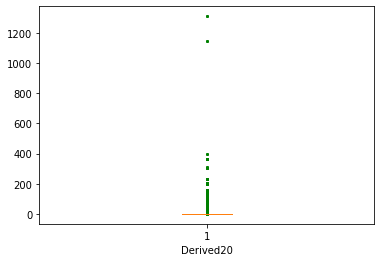

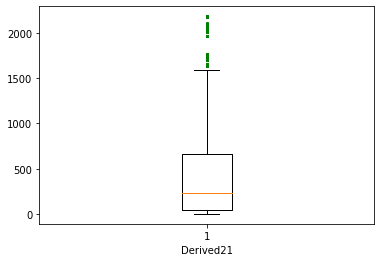

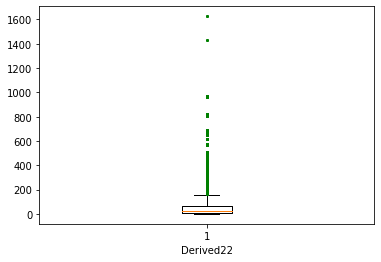

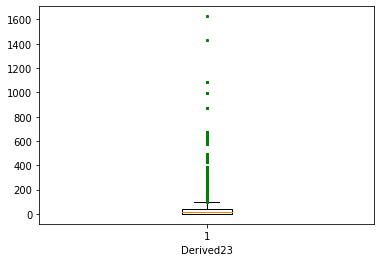

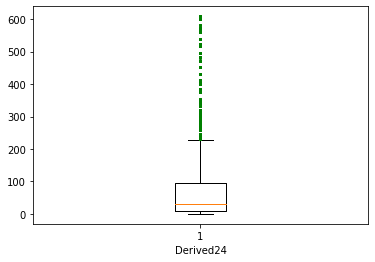

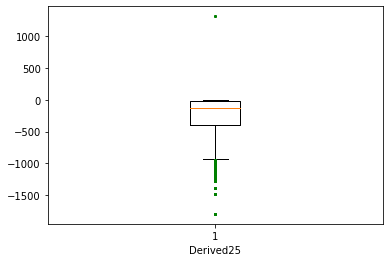

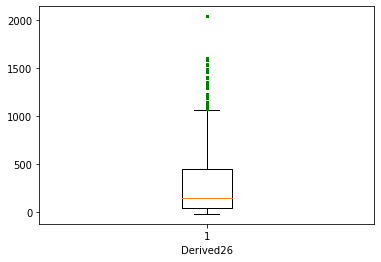

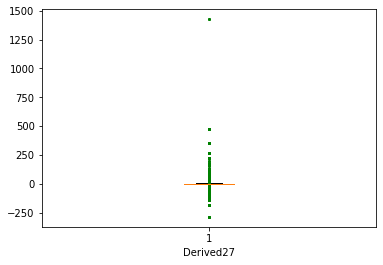

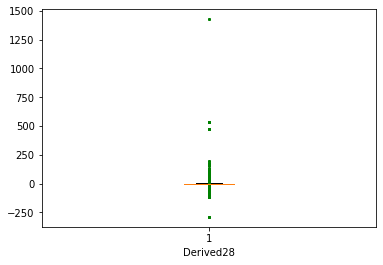

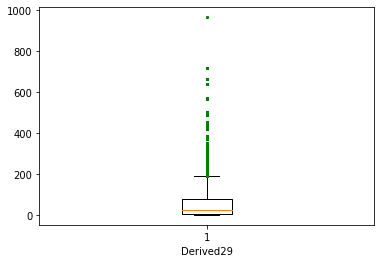

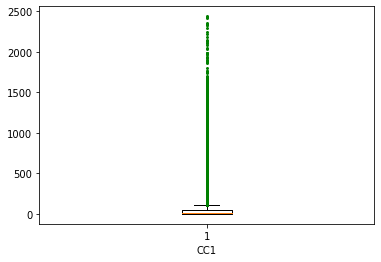

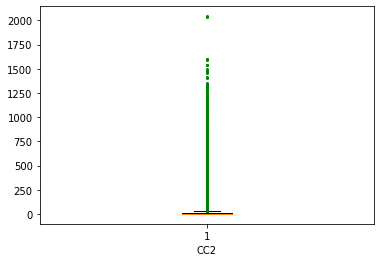

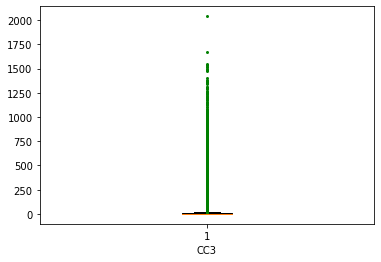

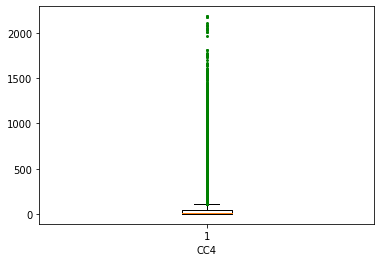

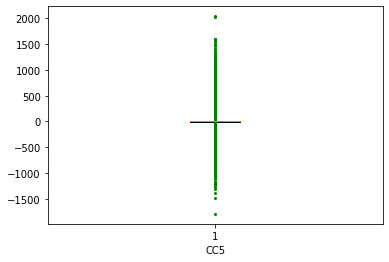

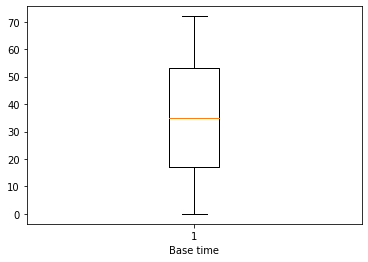

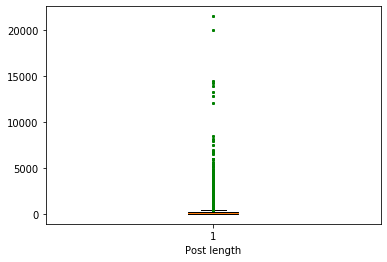

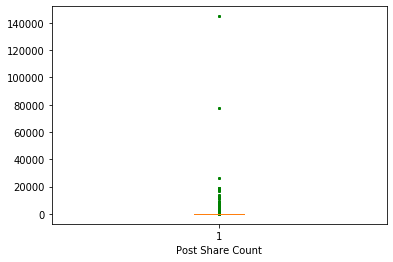

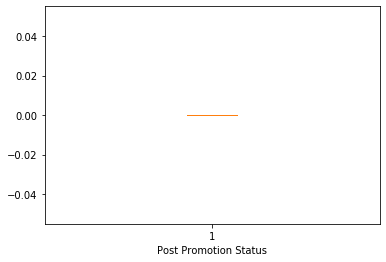

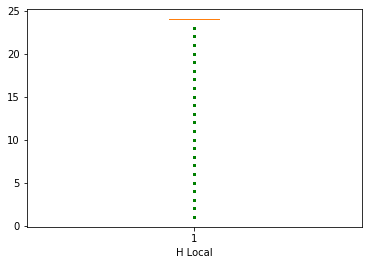

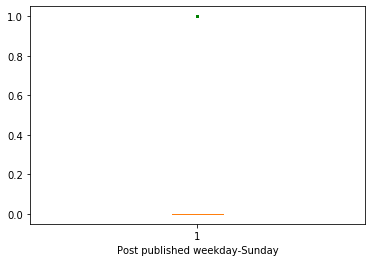

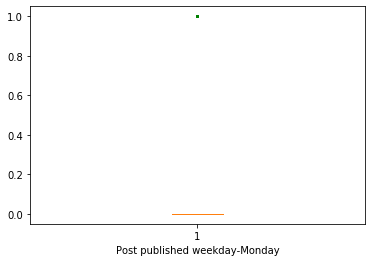

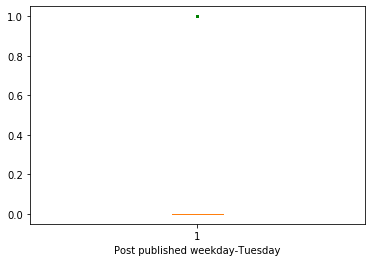

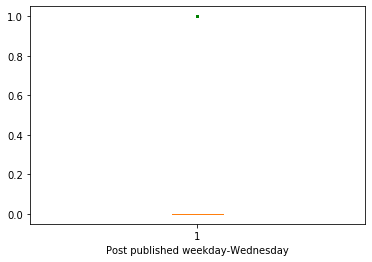

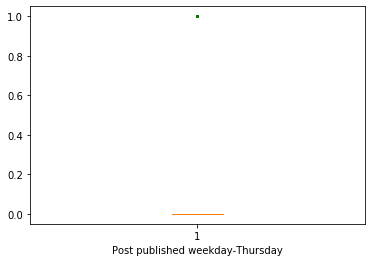

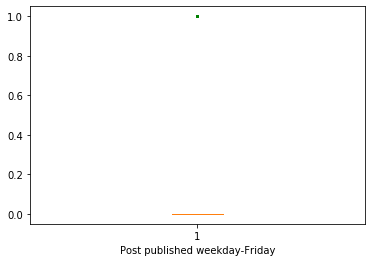

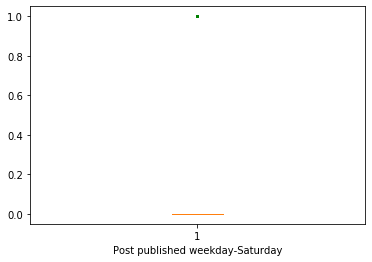

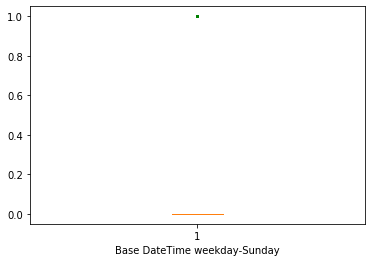

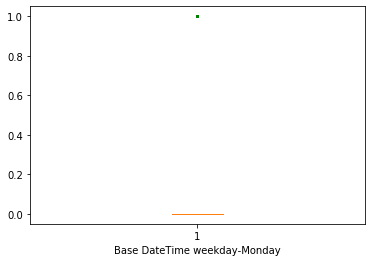

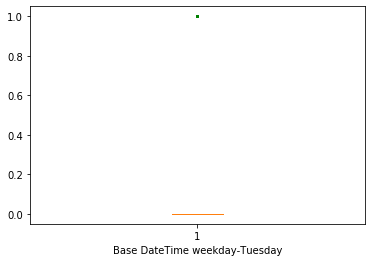

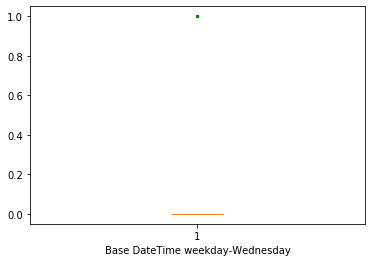

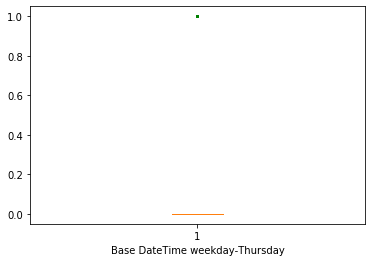

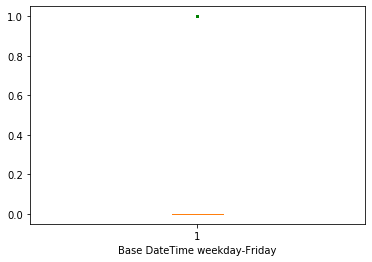

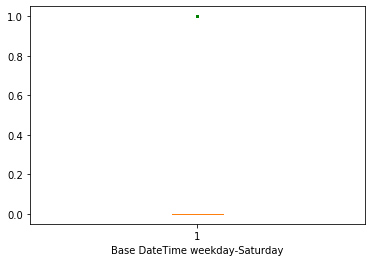

In [55]:
features_list = features.columns
flierprops = dict(marker='o', markerfacecolor='green', markersize=3,
                  markeredgecolor='none')
for feature in features_list: 
    feature_set = training_dataset[feature]
    plt.boxplot(feature_set, flierprops = flierprops)
    plt.xlabel(feature)
    plt.show()

## Correlation Analysis

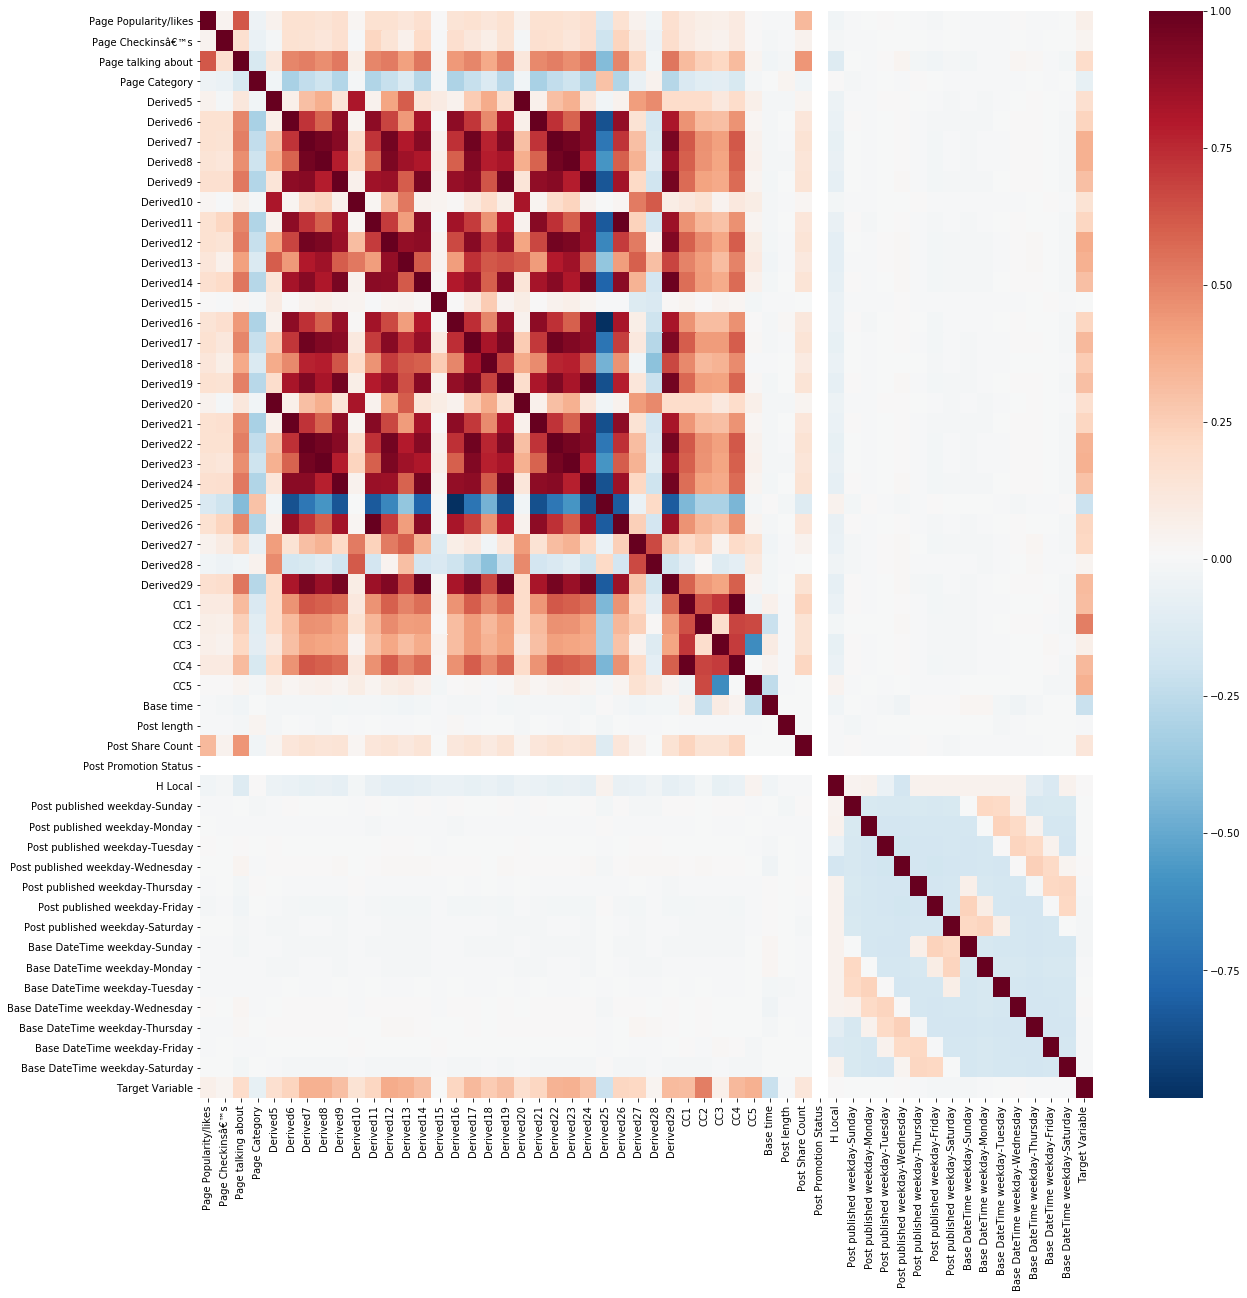

In [22]:
corr = training_dataset.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, cmap="RdBu_r")
plt.show()

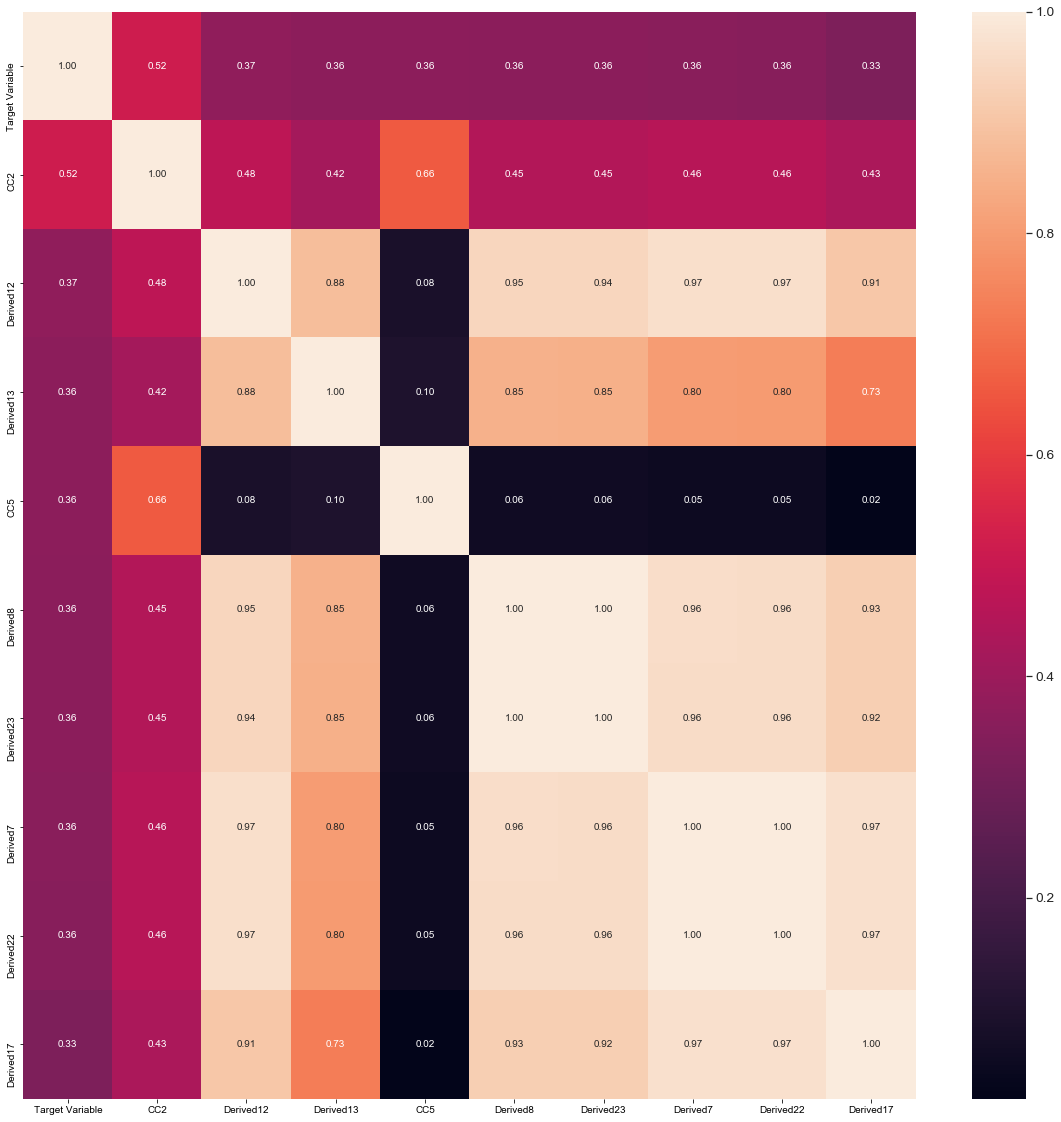

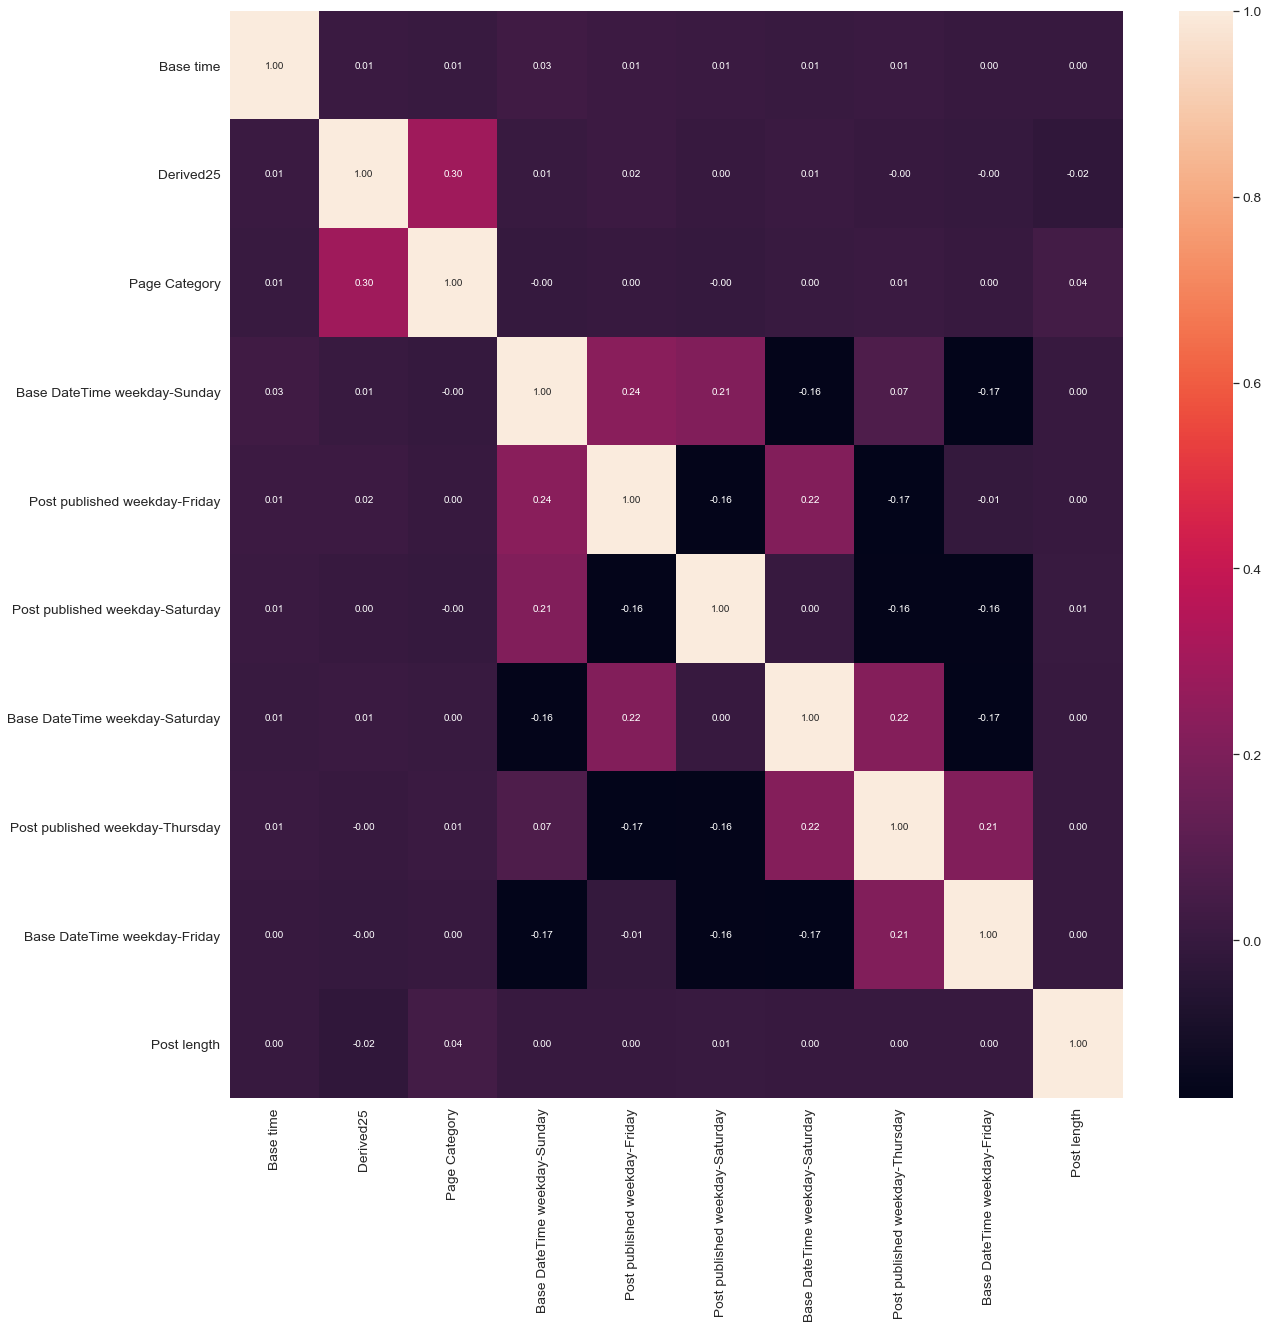

In [23]:
# The 10 most relevant features
plt.subplots(figsize=(20, 20))
c = corr.nlargest(10, 'Target Variable')['Target Variable'].index
cm = np.corrcoef(training_dataset[c].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

plt.subplots(figsize=(20, 20))
c = corr.nsmallest(10, 'Target Variable')['Target Variable'].index
cm = np.corrcoef(training_dataset[c].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

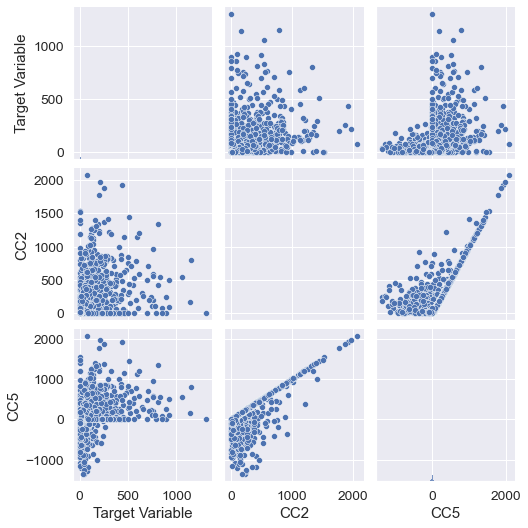

In [22]:
c_scatter = ["Target Variable", "CC2", "CC5"]
pair_scatter = sns.pairplot(training_dataset[c_scatter], height=2.5)
plt.show()

## Bivariate Analysis

### The highest comments in next H hrs is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Target variable'>

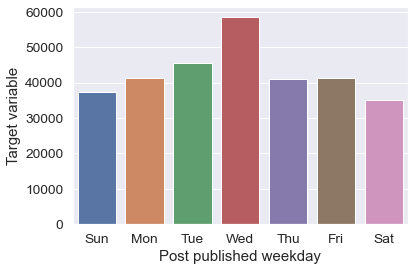

In [23]:
post_published_weekday_target_variable = post_published_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

post_published_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(post_published_weekday_target_variable), 
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Target variable", data=post_published_weekday_target_variable)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Target variable'>

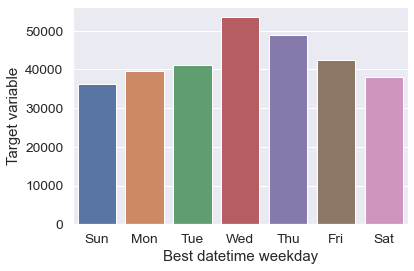

In [24]:
base_datetime_weekday_target_variable = base_datetime_weekday.iloc[:, 0:7].multiply(
    labels.iloc[:, 0], axis="index"
).sum()

base_datetime_weekday_target_variable = pd.DataFrame(
    {
        "Target variable": list(base_datetime_weekday_target_variable), 
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Target variable", data=base_datetime_weekday_target_variable)

### The highest posts is on Wednesday

<AxesSubplot:xlabel='Post published weekday', ylabel='Count'>

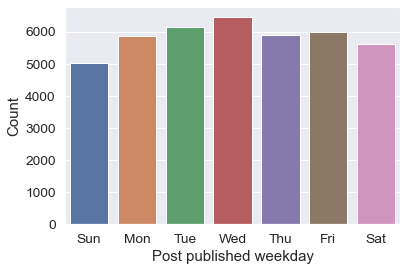

In [25]:
post_published_weekday_count = pd.DataFrame(
    {
        "Count": list(post_published_weekday.iloc[:, 0:7].sum()),
        "Post published weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Post published weekday", y="Count", data=post_published_weekday_count)

<AxesSubplot:xlabel='Best datetime weekday', ylabel='Count'>

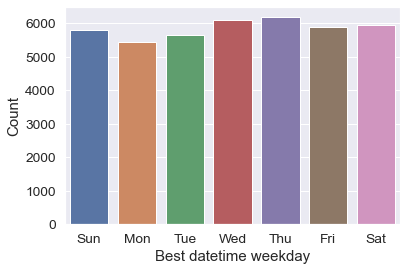

In [26]:
base_datetime_weekday_count = pd.DataFrame(
    {
        "Count": list(base_datetime_weekday.iloc[:, 0:7].sum()),
        "Best datetime weekday": ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    }
)

sns.barplot(x="Best datetime weekday", y="Count", data=base_datetime_weekday_count)

### The highest posts is at 24 H Local

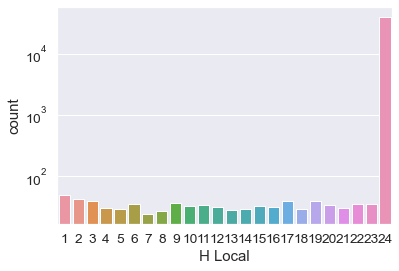

In [27]:
sns.countplot(x=training_dataset["H Local"].astype('int')).set_yscale("log")

### Most of the posts is at 24 H Local except Wednesday and Thursday

In [28]:
h_local_post_published_weekday = pd.concat([training_dataset["H Local"], post_published_weekday], axis=1)
h_local_post_published_weekday = h_local_post_published_weekday.groupby("H Local").sum()
h_local_post_published_weekday

,Post published weekday-Sunday,Post published weekday-Monday,Post published weekday-Tuesday,Post published weekday-Wednesday,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday
H Local,,,,,,,
1,0,0,14,35,0,0,0
2,0,0,12,31,0,0,0
3,0,0,13,27,0,0,0
4,0,0,8,22,0,0,0
5,0,0,8,21,0,0,0
6,0,0,8,27,0,0,0
7,0,0,10,14,0,0,0
8,0,0,6,21,0,0,0
9,0,0,10,27,0,0,0


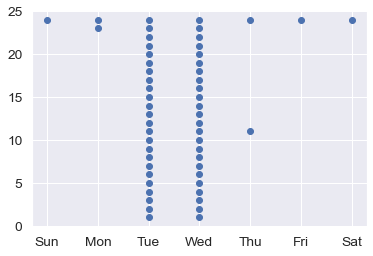

In [29]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_post_published_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

In [30]:
h_local_base_datetime_weekday = pd.concat([training_dataset["H Local"], base_datetime_weekday], axis=1)
h_local_base_datetime_weekday = h_local_base_datetime_weekday.groupby("H Local").sum()
h_local_base_datetime_weekday

,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
H Local,,,,,,,
1,0,0,0,0,6,43,0
2,0,0,0,0,7,36,0
3,0,0,0,0,9,31,0
4,0,0,0,0,3,27,0
5,0,0,0,0,8,21,0
6,0,0,0,0,9,26,0
7,0,0,0,0,8,16,0
8,0,0,0,0,5,22,0
9,0,0,0,0,12,25,0


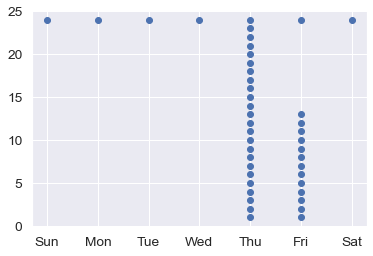

In [31]:
weekdays = pd.DataFrame(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
for i in range(7):
    for j in range(24):
        if h_local_base_datetime_weekday.iloc[j, i] != 0:
            plt.scatter(weekdays.iloc[i, 0], j + 1, color='b')

### Post Promotion Status has no effect on the predection

<AxesSubplot:xlabel='Post Promotion Status', ylabel='count'>

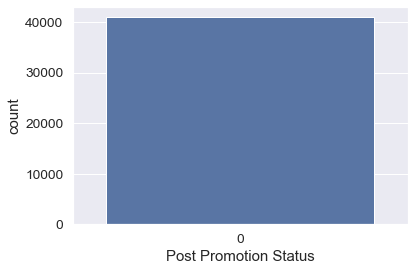

In [32]:
sns.countplot(x=training_dataset["Post Promotion Status"])

### The highest posts categories are 9, 18 and 24

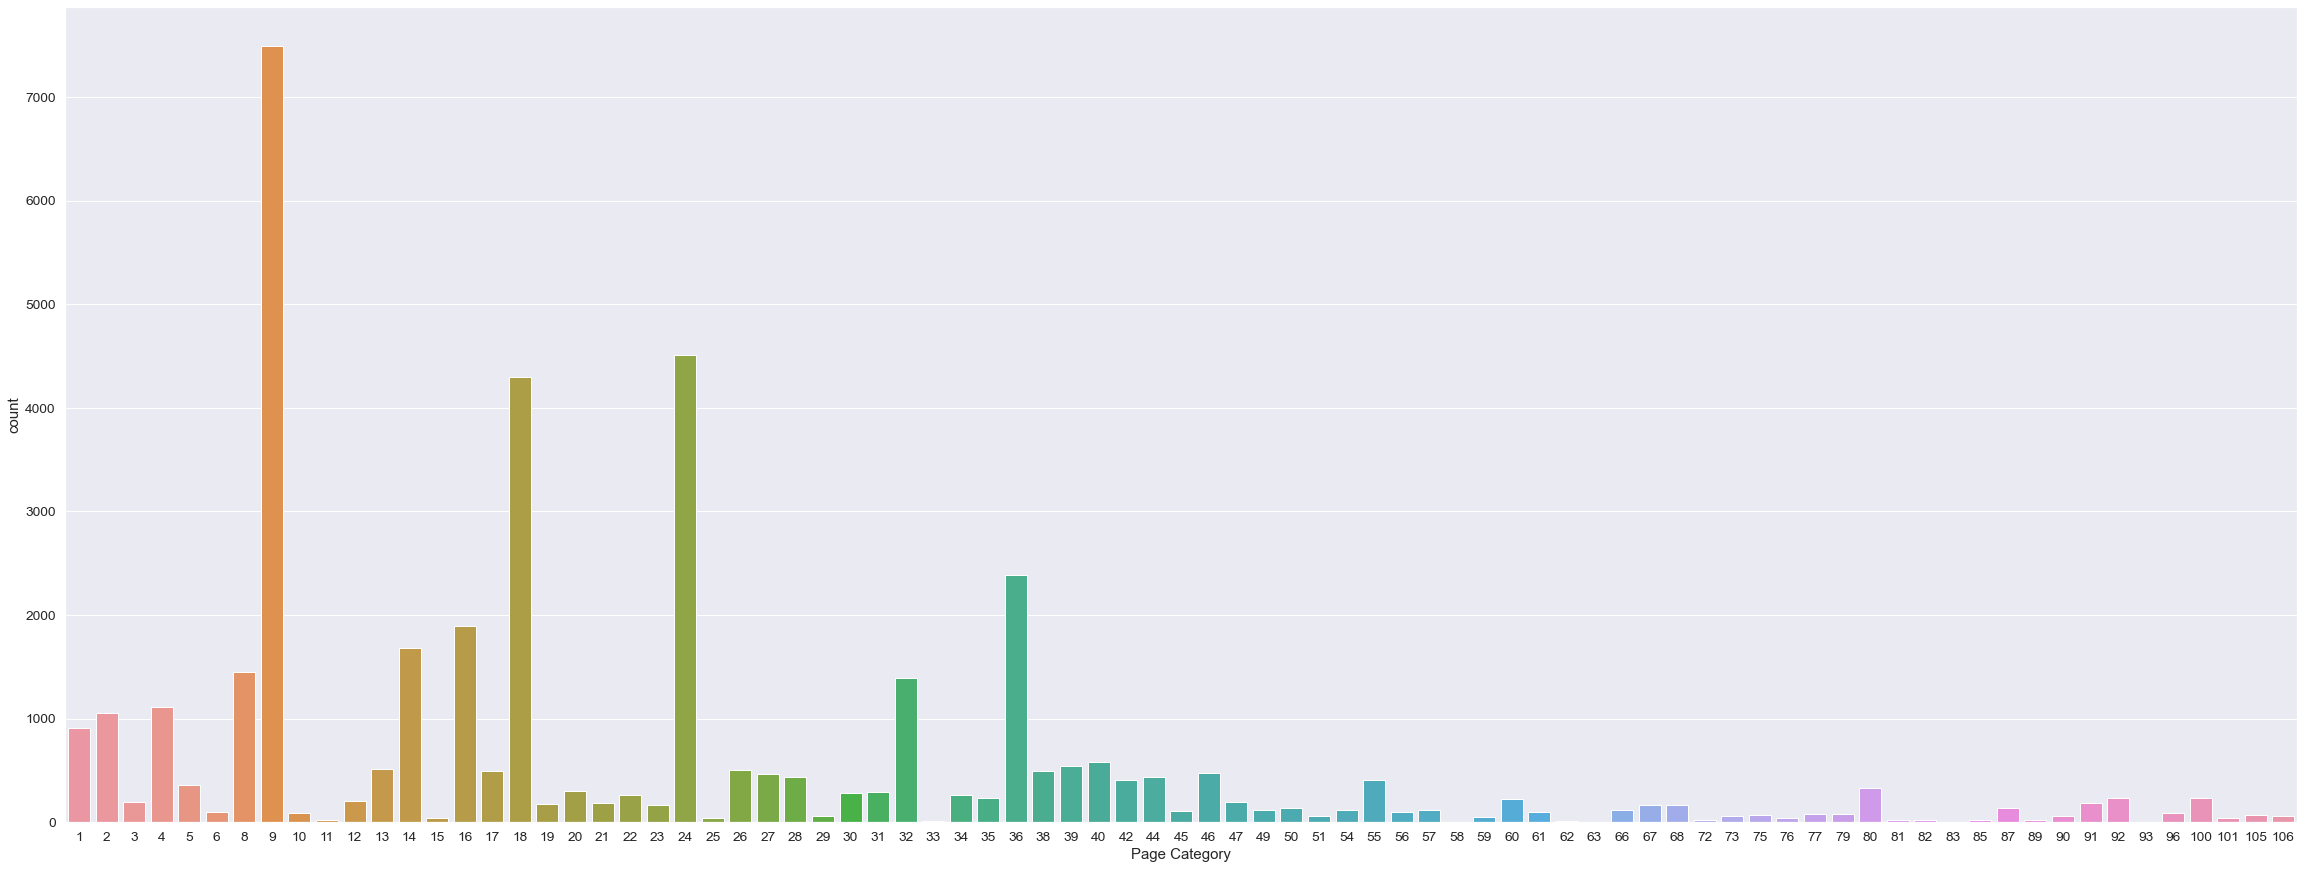

In [33]:
plt.subplots(figsize=(40, 15))
sns.countplot(x=training_dataset["Page Category"])
plt.show()

### The highest popularity category is 9

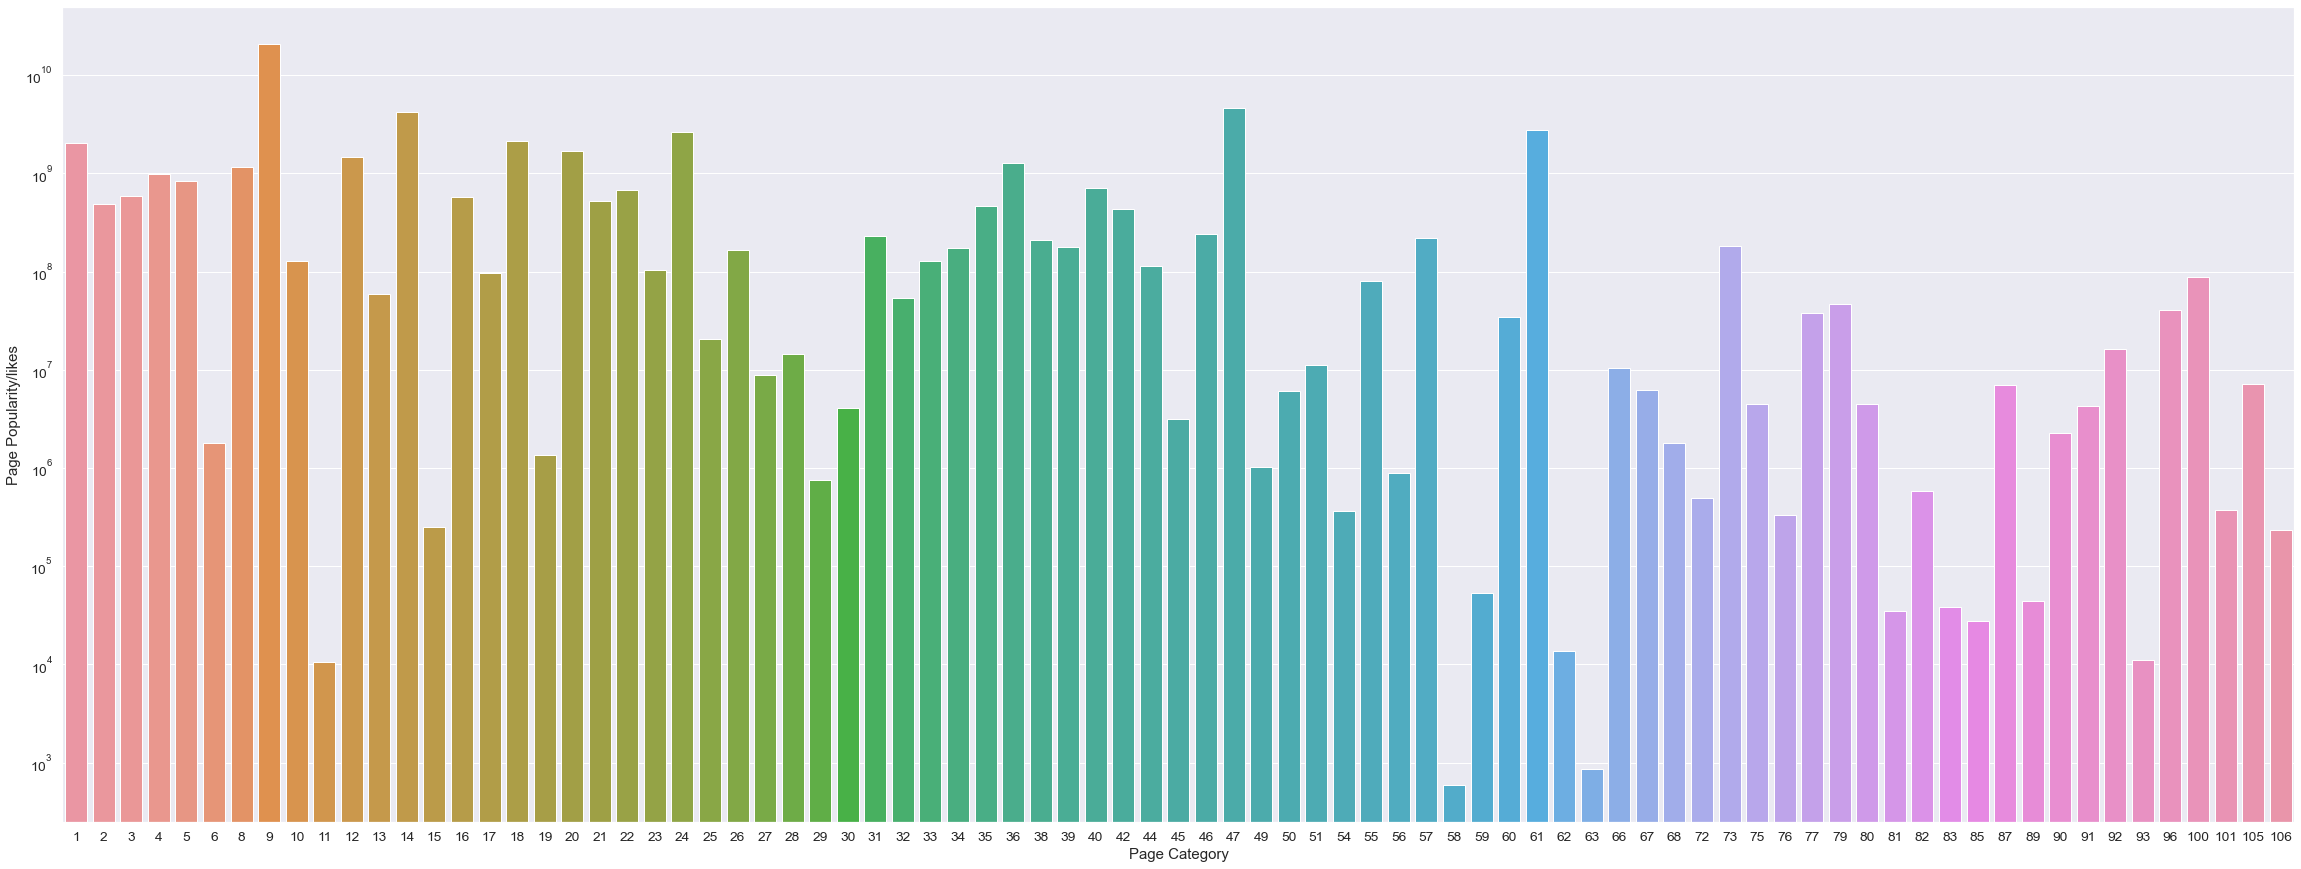

In [34]:
page_popularity_likes_page_category = pd.concat(
    [training_dataset["Page Popularity/likes"], training_dataset["Page Category"]], axis=1
)
page_popularity_likes_page_category = page_popularity_likes_page_category.groupby("Page Category").sum()
page_popularity_likes_page_category.index.name = "Page Category"
page_popularity_likes_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Page Popularity/likes", data=page_popularity_likes_page_category).set_yscale("log")
plt.show()

### The highest post share count category is 9

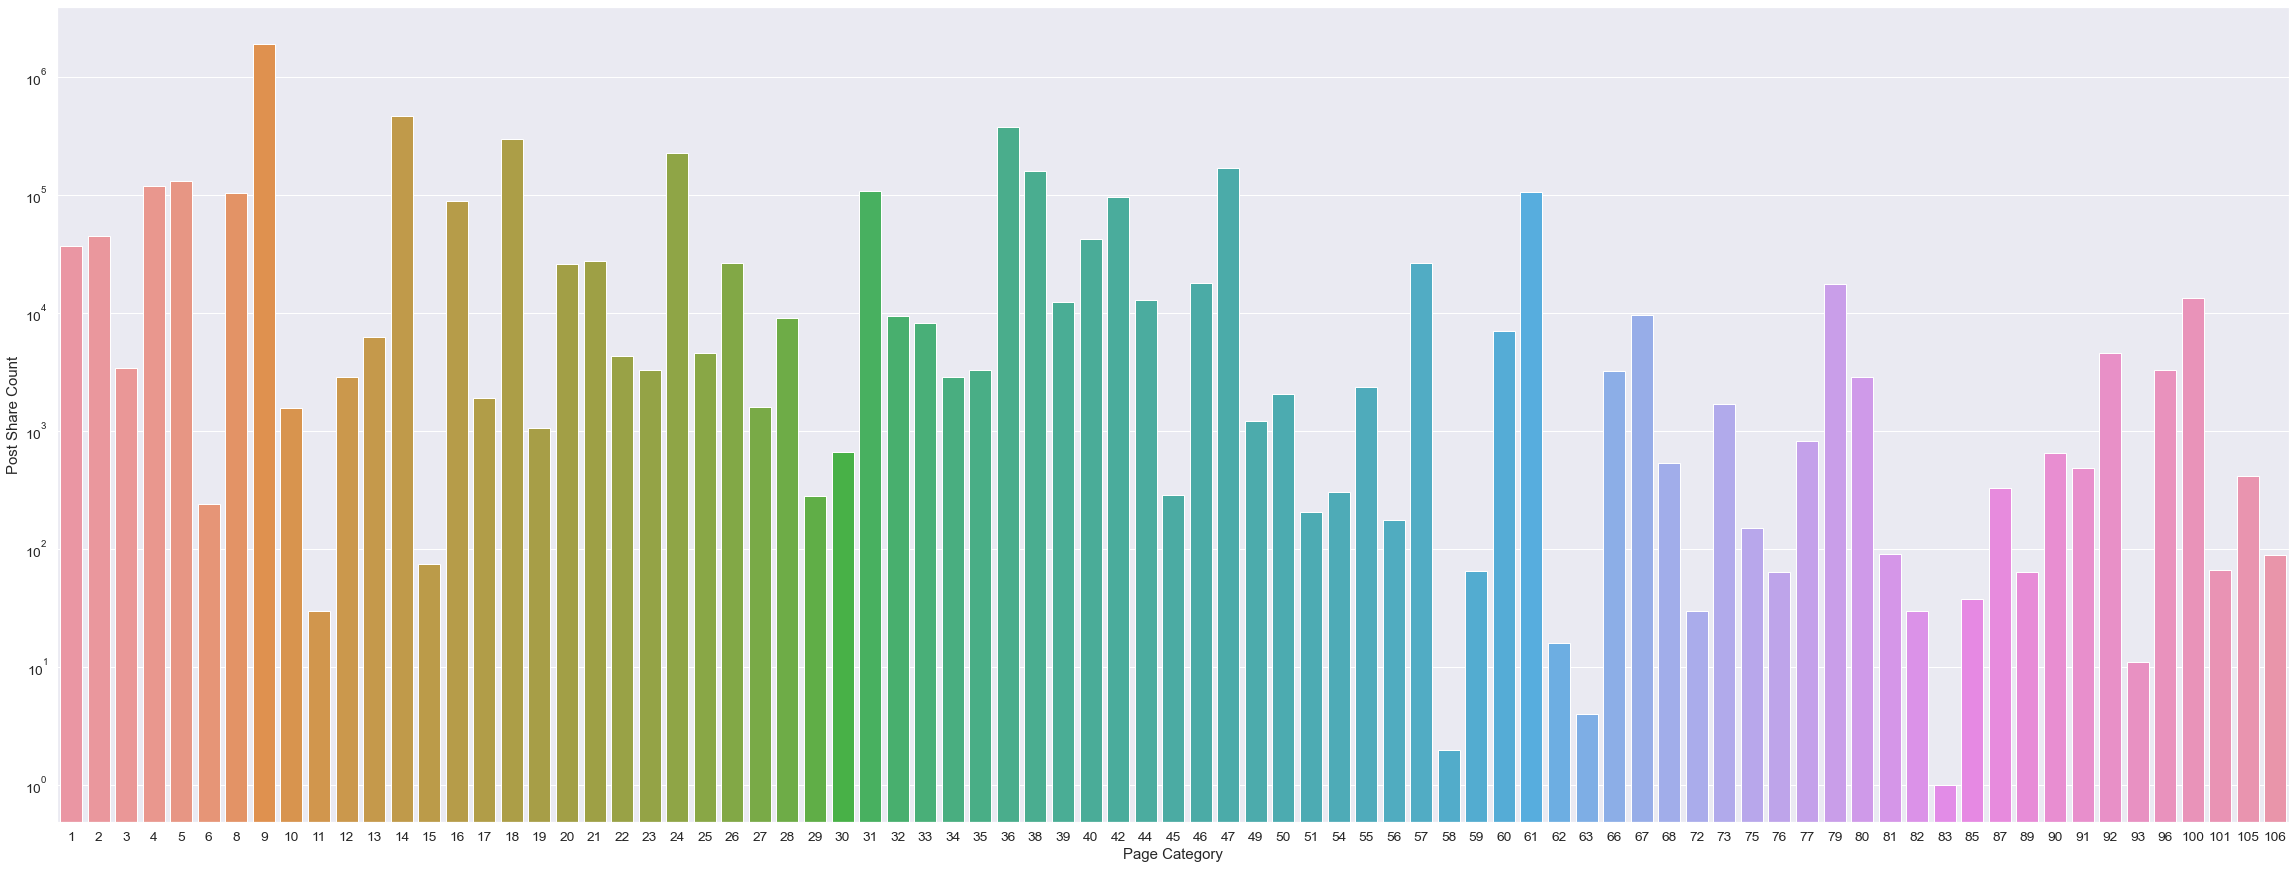

In [35]:
post_share_count_page_category = pd.concat(
    [training_dataset["Post Share Count"], training_dataset["Page Category"]], axis=1
)
post_share_count_page_category = post_share_count_page_category.groupby("Page Category").sum()
post_share_count_page_category.index.name = "Page Category"
post_share_count_page_category.reset_index(inplace=True)
plt.subplots(figsize=(40, 15))
sns.barplot(x="Page Category", y="Post Share Count", data=post_share_count_page_category).set_yscale("log")
plt.show()

### When post is longer, the popularity of the post is lower

<AxesSubplot:xlabel='Post length', ylabel='Page Popularity/likes'>

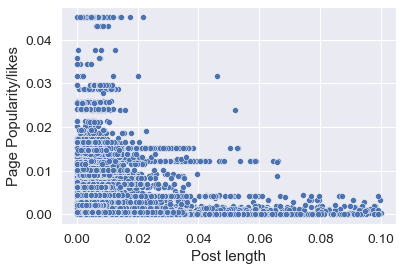

In [36]:
page_popularity_likes_post_length = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post length"]], axis=1
)

page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Page Popularity/likes"] < 0.05
]
page_popularity_likes_post_length = page_popularity_likes_post_length[
    page_popularity_likes_post_length["Post length"] < 0.1
]

sns.scatterplot(x="Post length", y="Page Popularity/likes", data=page_popularity_likes_post_length)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='Post Share Count'>

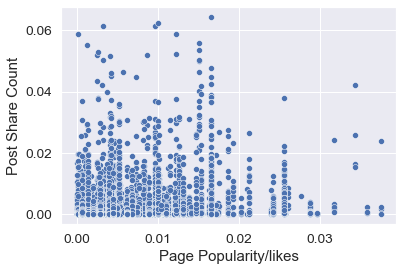

In [37]:
page_popularity_likes_post_share_count = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["Post Share Count"]], axis=1
)

page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Page Popularity/likes"] < 0.04
]
page_popularity_likes_post_share_count = page_popularity_likes_post_share_count[
    page_popularity_likes_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page Popularity/likes", y="Post Share Count", data=page_popularity_likes_post_share_count)

<AxesSubplot:xlabel='Page talking about', ylabel='Post Share Count'>

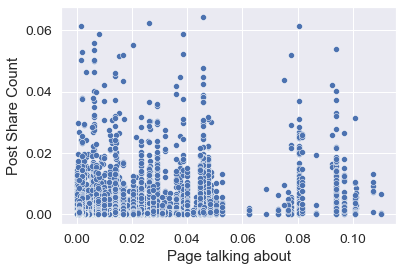

In [38]:
page_talking_about_post_share_count = pd.concat(
    [training_dataset_norm["Page talking about"], training_dataset_norm["Post Share Count"]], axis=1
)

page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Page talking about"] < 0.13
]
page_talking_about_post_share_count = page_talking_about_post_share_count[
    page_talking_about_post_share_count["Post Share Count"] < 0.07
]

sns.scatterplot(x="Page talking about", y="Post Share Count", data=page_talking_about_post_share_count)

<AxesSubplot:xlabel='Page Popularity/likes', ylabel='CC2'>

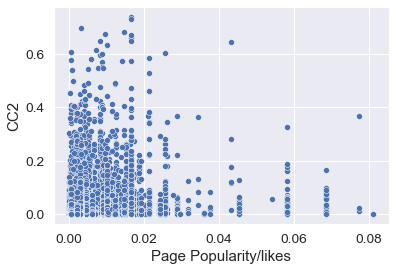

In [39]:
page_popularity_likes_cc2 = pd.concat(
    [training_dataset_norm["Page Popularity/likes"], training_dataset_norm["CC2"]], axis=1
)

page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["Page Popularity/likes"] < 0.1
]
page_popularity_likes_cc2 = page_popularity_likes_cc2[
    page_popularity_likes_cc2["CC2"] < 0.8
]

sns.scatterplot(x="Page Popularity/likes", y="CC2", data=page_popularity_likes_cc2)

### When post is longer, the comments in last 24 hours is fewer

<AxesSubplot:xlabel='Post length', ylabel='CC2'>

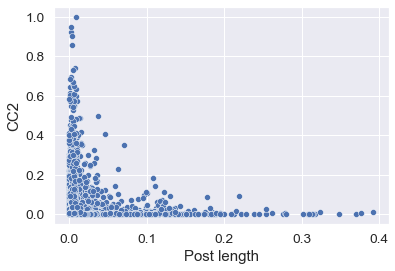

In [40]:
post_length_cc2 = pd.concat(
    [training_dataset_norm["Post length"], training_dataset_norm["CC2"]], axis=1
)

post_length_cc2 = post_length_cc2[
    post_length_cc2["Post length"] < 0.4
]

sns.scatterplot(x="Post length", y="CC2", data=post_length_cc2)